In [1]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
curr_dir = Path("__notebook__").parent.resolve()
sys.path.append(str(curr_dir.parent))
import bvcmap

In [2]:
df = pd.read_csv(curr_dir / "sample_data.csv", index_col=0)
df.head()

,KEGG_PATHWAYS_IN_CANCER,WP_INTERACTIONS_BETWEEN_IMMUNE_CELLS_AND_MICRORNAS_IN_TUMOR_MICROENVIRONMENT,x,y
CGGTACTAGAATCAAA-1,-3.582754,0.986713,43,83
ACTGTGCTAGTAGATC-1,9.117906,1.972974,13,31
GAAACTCGTGCGATGC-1,-4.129408,0.100413,28,24
ATAGGTTGGGCAGATG-1,-2.775207,-0.218832,28,64
CTACGACTAGCTATAA-1,-7.275145,-1.579688,38,24


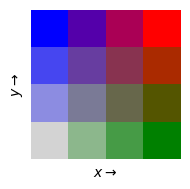

In [5]:
cmap = bvcmap.BivariateCmap.from_corner_colors(
    bottom_left_corner="lightgrey",
    top_left_corner="blue",
    top_right_corner="red",
    bottom_right_corner="green",
    bottom_to_top_dim=4,
    left_to_right_dim=4,
)
cmap

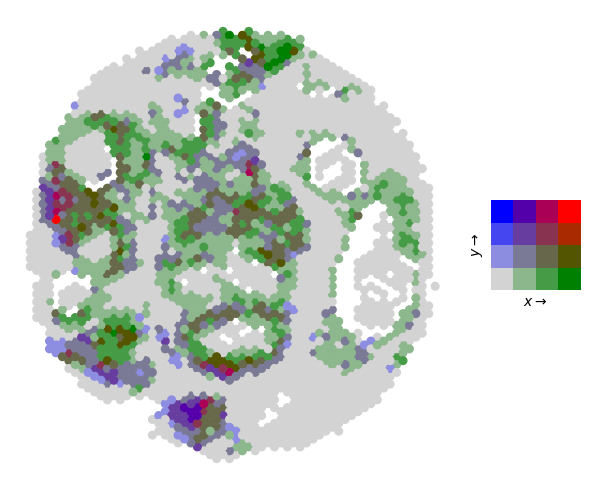

In [11]:
fig, axs = plt.subplots(figsize=(6, 5), width_ratios=(5/6, 1/6), ncols=2)
bvcmap.scatterplot(
    x=df["x"],
    y=df["y"],
    hue_x=df["KEGG_PATHWAYS_IN_CANCER"],
    hue_y=df["WP_INTERACTIONS_BETWEEN_IMMUNE_CELLS_AND_MICRORNAS_IN_TUMOR_MICROENVIRONMENT"],
    cmap=cmap,
    ax=axs[0]
)
bvcmap.legend(
    cmap=cmap,
    ax=axs[1]
)
plt.close(fig)
fig